# Centrality


### Libraries 

Headers needed to import data and analyze centrality 

In [429]:
import csv
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plot
import matplotlib.colors as mcolors
import community
import pandas as pd
import zipfile
import collections  
import urllib.request
import networkx.algorithms.bipartite as bipartite
from prettytable import PrettyTable
import pandas as pd
import codecs
import shutil
from networkx.algorithms import bipartite as bp

### Data

Through this assignment the Quakers Society of friends Founded in England in the mid-seventeenth century will be analyzed for centrality. Quakers’ numbers grew rapidly in the mid to late-seventeenth century and their members spread through the British Isles, Europe, and the New World colonies—especially Pennsylvania, founded by Quaker leader William Penn.

### Import Data
Improt the data from the following links:

Nodes:

'https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/quakers/quaker-nodes.csv'

Edges:

'https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/quakers/quaker-edges.csv'

In [430]:
url = 'https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/quakers/quaker-nodes.csv'
response = urllib.request.urlopen(url)
nr = csv.reader(codecs.iterdecode(response, 'utf-8'))
nodes = [n for n in nr][0:]
node_names = [n[0] for n in nodes]  
nodesHeader=nodes[0]
print("Get the column\n\n Nodes:\n", nodesHeader)
del node_names[0]
del nodes[0]

url = 'https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/quakers/quaker-edges.csv'
response = urllib.request.urlopen(url)
er = csv.reader(codecs.iterdecode(response, 'utf-8'))
edges = [tuple(e) for e in er][0:] 
nodesHeader=list(edges[0])
print("\nEdges:\n", nodesHeader)
del edges[0]

G = nx.Graph()                                                        
G.add_nodes_from(node_names)                             
G.add_edges_from(edges)  

Get the column

 Nodes:
 ['Id', 'Label', 'historical significance', 'gender', 'birthdate', 'deathdate', 'other_id']

Edges:
 ['Source', 'Target']


Get the graph summary to explore the number of nodes and edges and the type of the graph

In [431]:
print(nx.info(G)) 

Name: 
Type: Graph
Number of nodes: 96
Number of edges: 162
Average degree:   3.3750


 The graph consist of 96 nodes and 162 edges with a 3.375 degree of freedom

In [432]:
displayNodes = pd.DataFrame(nodes,columns = ['id','Label', 'historical significance', 'gender', 'birthdate', 'deathdate', 'other_id'])
displayNodes = displayNodes.drop(columns=['Label'])
displayNodes.style

,id,historical significance,gender,birthdate,deathdate,other_id
0,George Keith,Quaker schismatic and Church of England clergyman,male,1638,1716,10006784
1,Robert Barclay,religious writer and colonial governor,male,1648,1690,10054848
2,Benjamin Furly,merchant and religious writer,male,1636,1714,10004625
3,Anne Conway Viscountess Conway and Killultagh,philosopher,female,1631,1679,10002755
4,Franciscus Mercurius van Helmont,physician and cabbalist,male,1614,1698,10005781
5,William Penn,Quaker leader and founder of Pennsylvania,male,1644,1718,10009531
6,George Fox,a founder of the Religious Society of Friends (Quakers),male,1624,1691,10004524
7,George Whitehead,Quaker leader and writer,male,1637,1724,10012813
8,William Bradford,printer,male,1663,1752,10001445
9,James Parnel,Quaker martyr,male,1636,1656,10009347


In [433]:
displayEgdes=pd.DataFrame(list(edges),columns = nodesHeader)
displayEgdes.style

,Source,Target
0,George Keith,William Bradford
1,George Keith,George Whitehead
2,George Keith,George Fox
3,George Keith,William Penn
4,George Keith,Franciscus Mercurius van Helmont
5,George Keith,Anne Conway Viscountess Conway and Killultagh
6,George Keith,Benjamin Furly
7,George Keith,Robert Barclay
8,Robert Barclay,David Barclay of Ury
9,Benjamin Furly,Robert Barclay


Now it is time to take a look into the network using the tension spring method.

In [434]:
spring_pos=nx.spring_layout(G)

Find the avarage degree of the network 

In [435]:
degrees = dict(G.degree())
avgDegree = sum(degrees.values())/len(degrees)
print(avgDegree)

3.375


Get the degree centrality of all the nodes in the network and store them into an array to use them as node weight for the graphs 

In [436]:
measures=nx.degree_centrality(G)
val=list(measures.values())
val=[x*7500 for x in val]

Get an insight into the network.

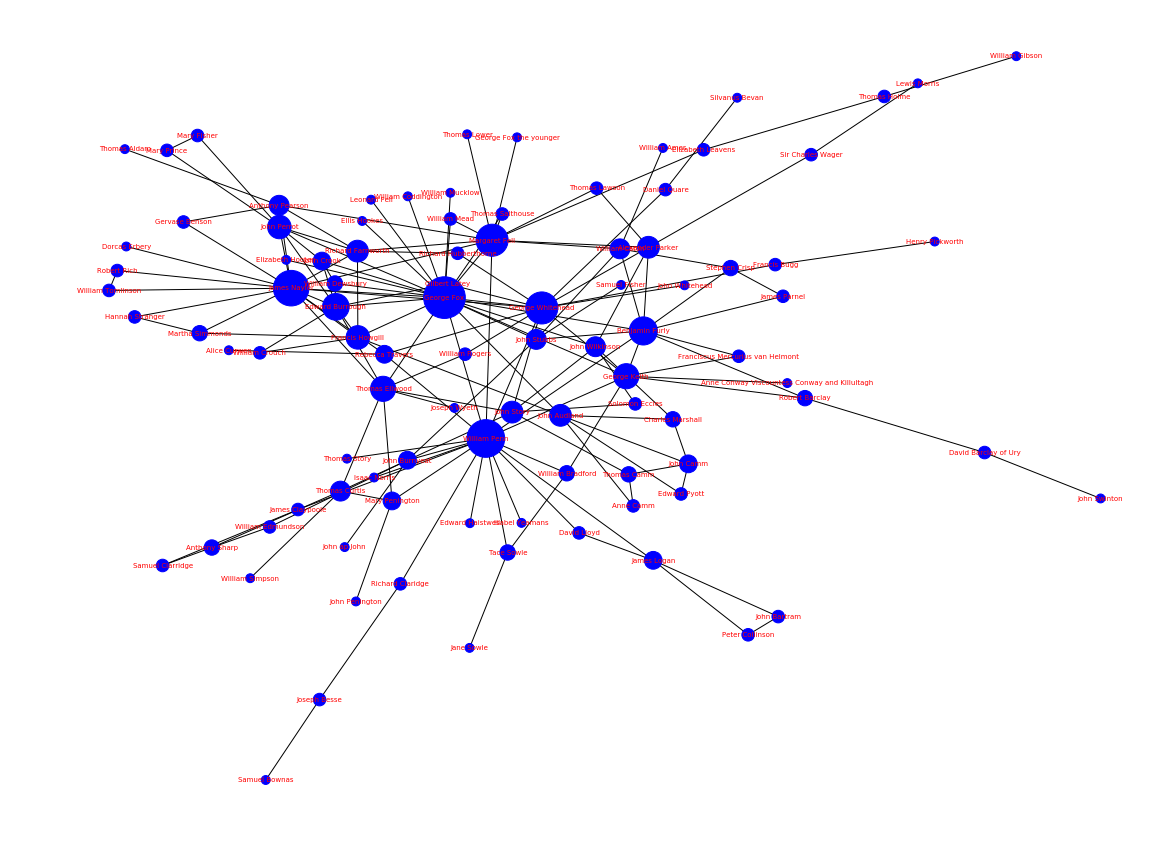

In [437]:
nx.draw_networkx(G,node_size=val,  node_color="b",
                                   font_size=7,
                                   font_color='r',
                                   nodelist=measures.keys())
   
fig = plot.gcf()
fig.set_size_inches(20,15)
plot.axis('off')
plot.show()

Get an insight into the network using sircular graph.

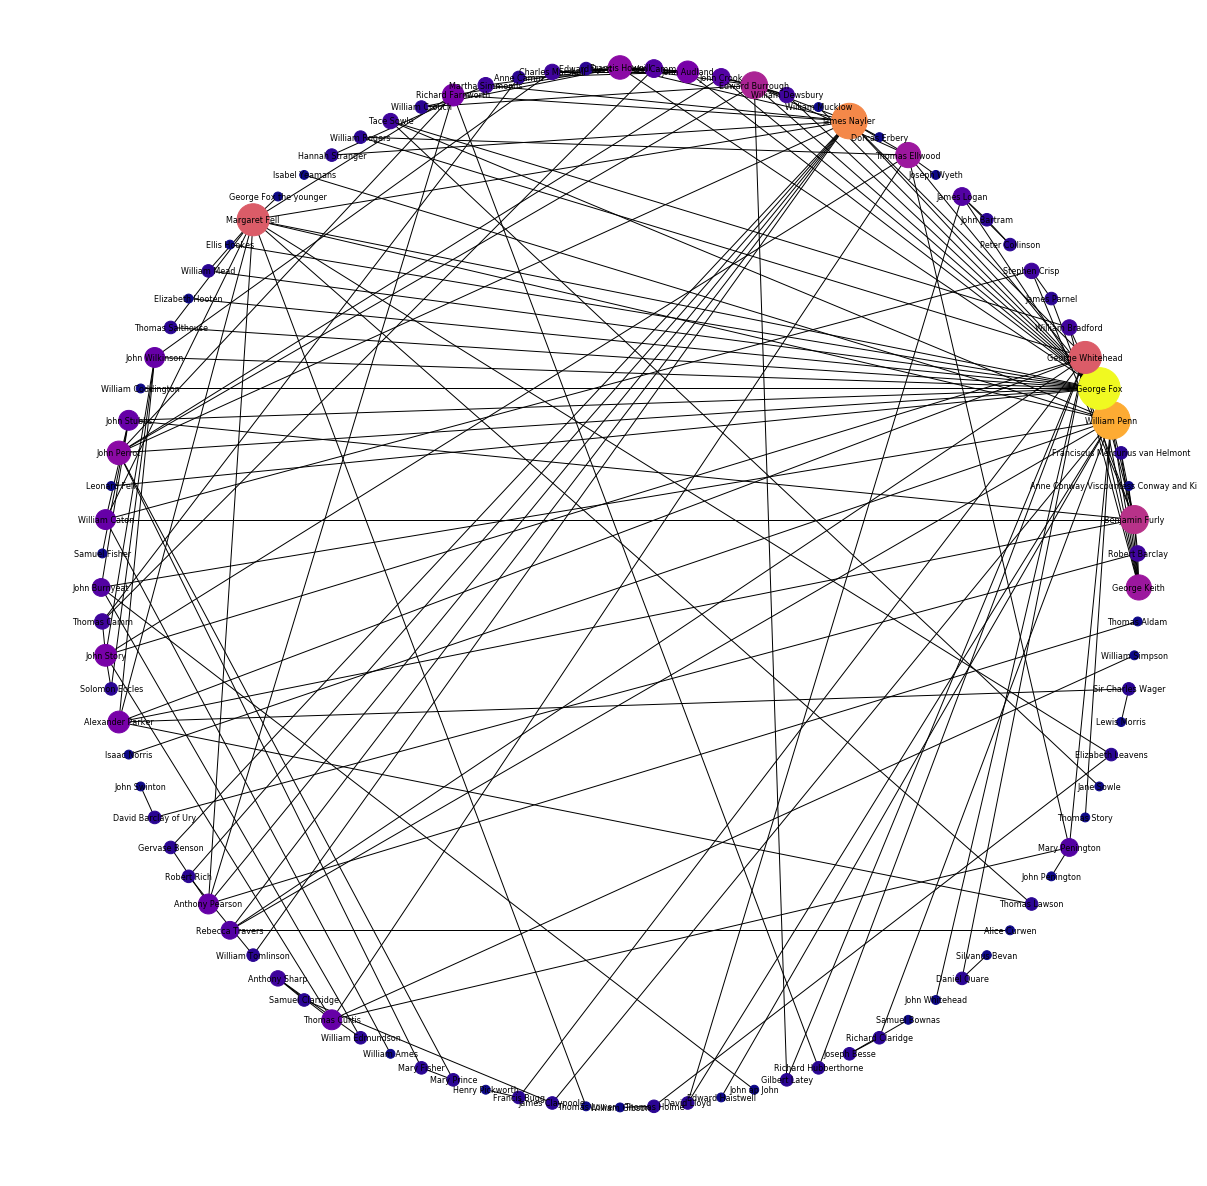

In [438]:
fig = plot.gcf()
fig.set_size_inches(16,16)
nx.draw_circular(G,node_size=val, cmap=plot.cm.plasma, 
                                   node_color=val,
                                   font_size=8,
                                   with_labels=True,
                                   nodelist=measures.keys())
    
plot.show()

The two above graphs indicates that there is significant figures within the Quakers network.  

Find the quantitative measurements starting with the density of the network.

In [439]:
density = nx.density(G)
print("Network density:", round(density,5)*100,"%")

Network density: 3.553 %


The 3.5 % density is very low which indicates that the netwok connections between the Quakers was not strong as community.  

Create functions for custom graphs to plot various network characteristics  

In [440]:
def drawGraph(G, pos, measures, measure_name):
    value=list(measures.values())
    value=[x*250 for i in value]
    nodes = nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plot.cm.plasma, 
                                   node_color=value,
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    edges = nx.draw_networkx_edges(G, pos)

    fig = plot.gcf()
    fig.set_size_inches(16,12)
    plot.title(measure_name)
    plot.colorbar(nodes)
    plot.axis('off')
    plot.show()

In [441]:
def drawGraph(G, pos, measures, measure_name):
    value=list(measures.values())
    value=[x*20000 for x in value]
    nodes = nx.draw_networkx(G, pos,node_size=value, cmap=plot.cm.plasma, 
                                   node_color=value,
                                   font_size=8,
                                   with_labels=True,
                                   nodelist=measures.keys())
    fig = plot.gcf()
    fig.set_size_inches(24,18)
    plot.title(measure_name)
    #plot.colorbar()
    plot.axis('off')
    plot.show()

In [442]:
def drawGraphColorBar(G, pos, measures, measure_name):
    value=list(measures.values())
    value=[x*7500 for x in value]
    nodes = nx.draw_networkx_nodes(G, pos, node_size=value, cmap=plot.cm.plasma, 
                                   node_color=value,
                                   font_size=8,
                                   nodelist=measures.keys())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, with_labels=True,font_weight='bold')

    

    fig = plot.gcf()
    fig.set_size_inches(30,18)
    plot.title(measure_name)
    plot.colorbar(nodes)
    plot.axis('off')
    plot.show()

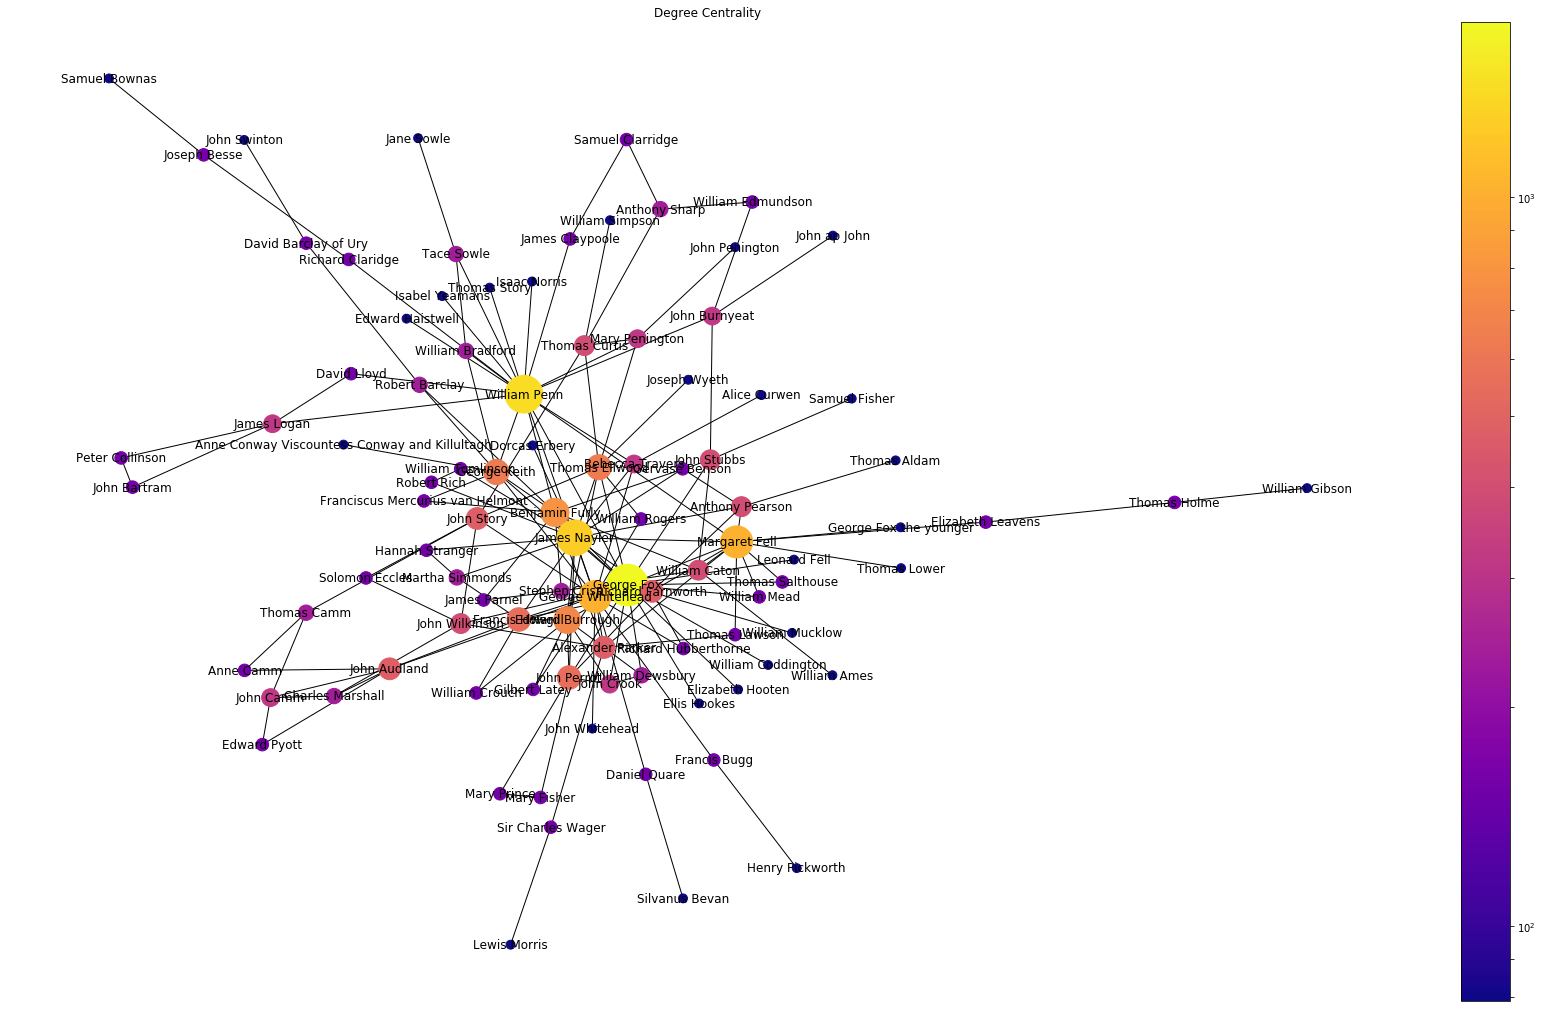

In [443]:
drawGraphColorBar(G, spring_pos, nx.degree_centrality(G), 'Degree Centrality')

Based on the degree of centrality network, we could determine that some individuals express a high degree of significance such as George fox and William Penn. The graph shows the degree of centrality and importance from highest to lowest of all the nodes in the network. 

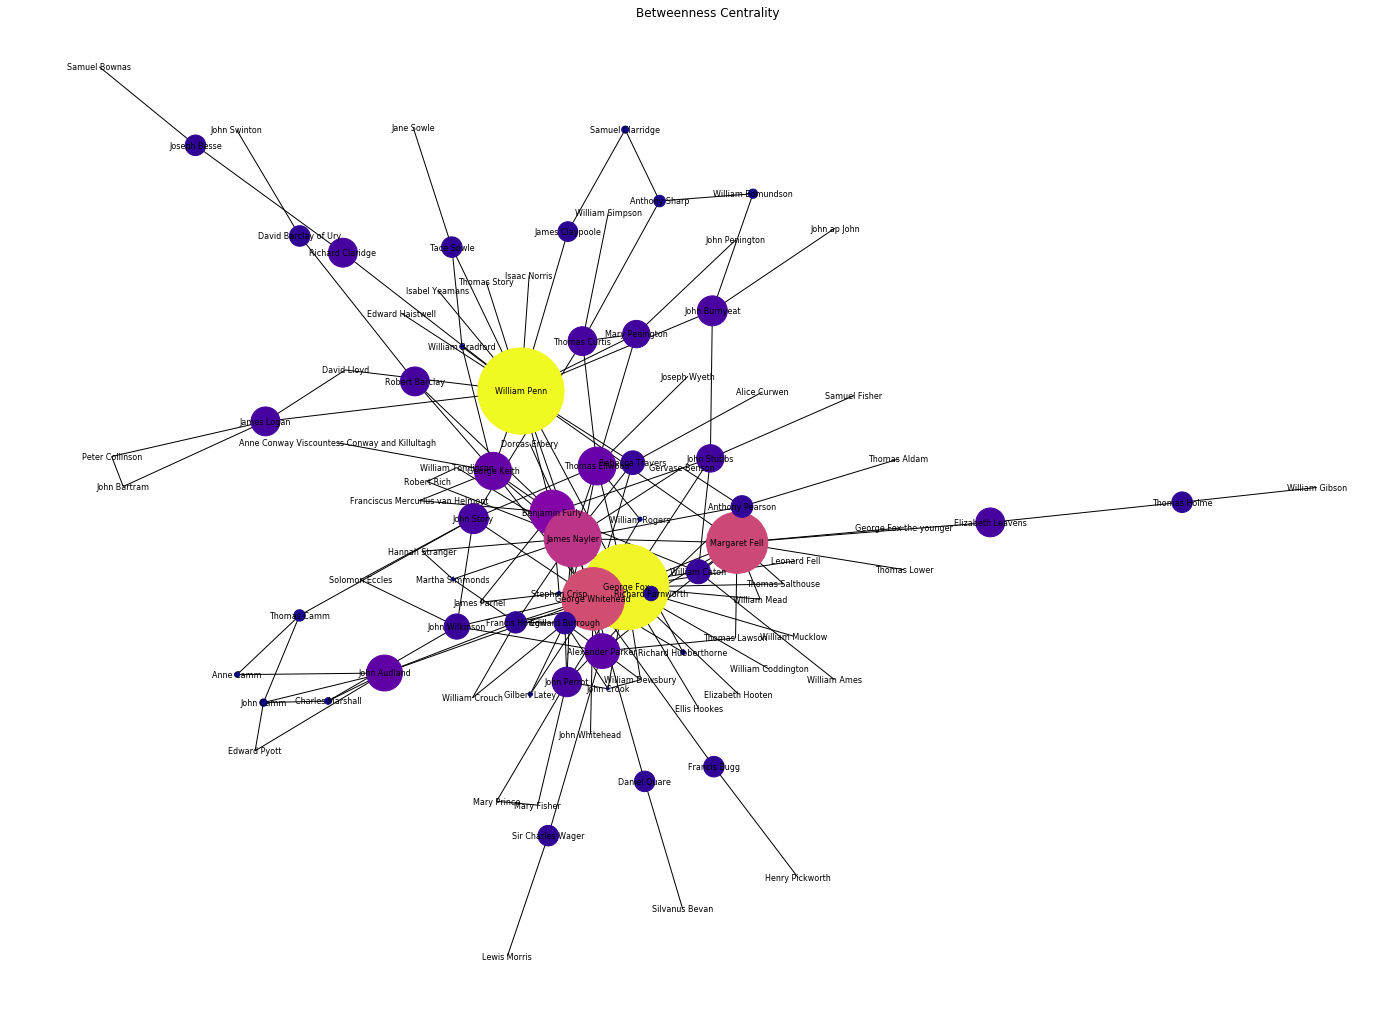

In [444]:
drawGraph(G, spring_pos,  nx.betweenness_centrality(G), 'Betweenness Centrality')

The above graph shows which nodes act as ‘bridges’ between nodes in a network. Based on the graph Williams Penn and George Fox and couple other individual are inter communication that holding the community hub of Quakers together. They are key communication individuals that are connected to many other individual in the network.  

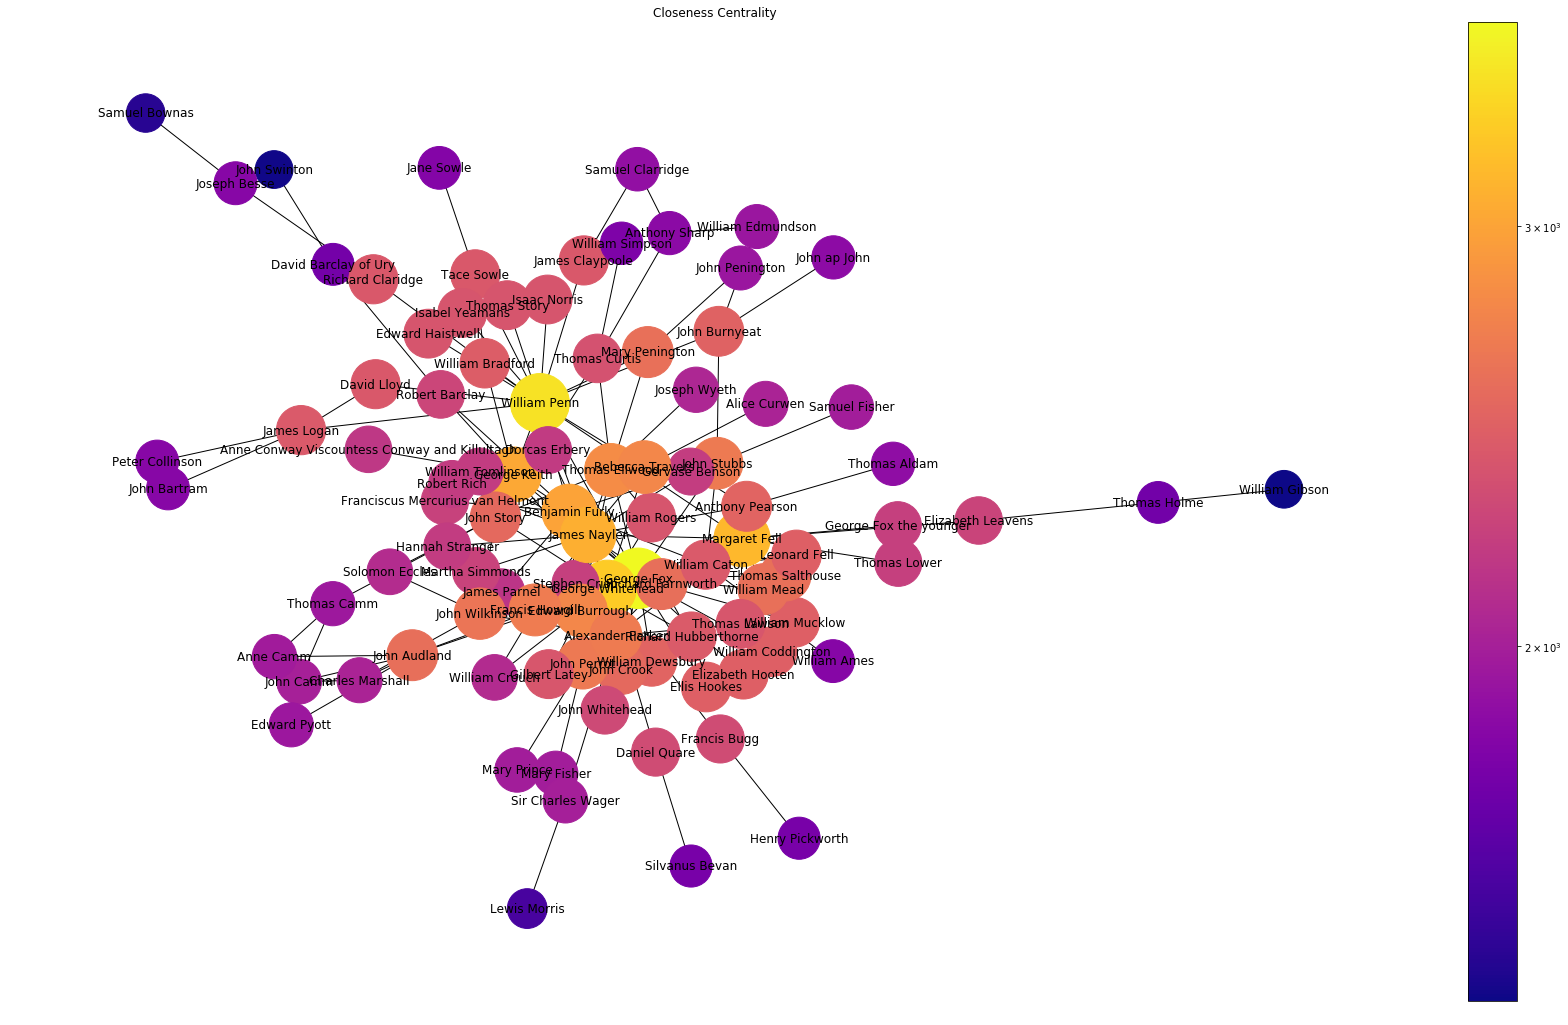

In [445]:
drawGraphColorBar(G, spring_pos, nx.closeness_centrality(G), 'Closeness Centrality')

The closeness measure between nodes seems to have close distance between connections. The closeness measures show that the bridge nodes are very connected to their surrounded nodes in their community.

 Find the relative influence of a node within a network using katz centrality.

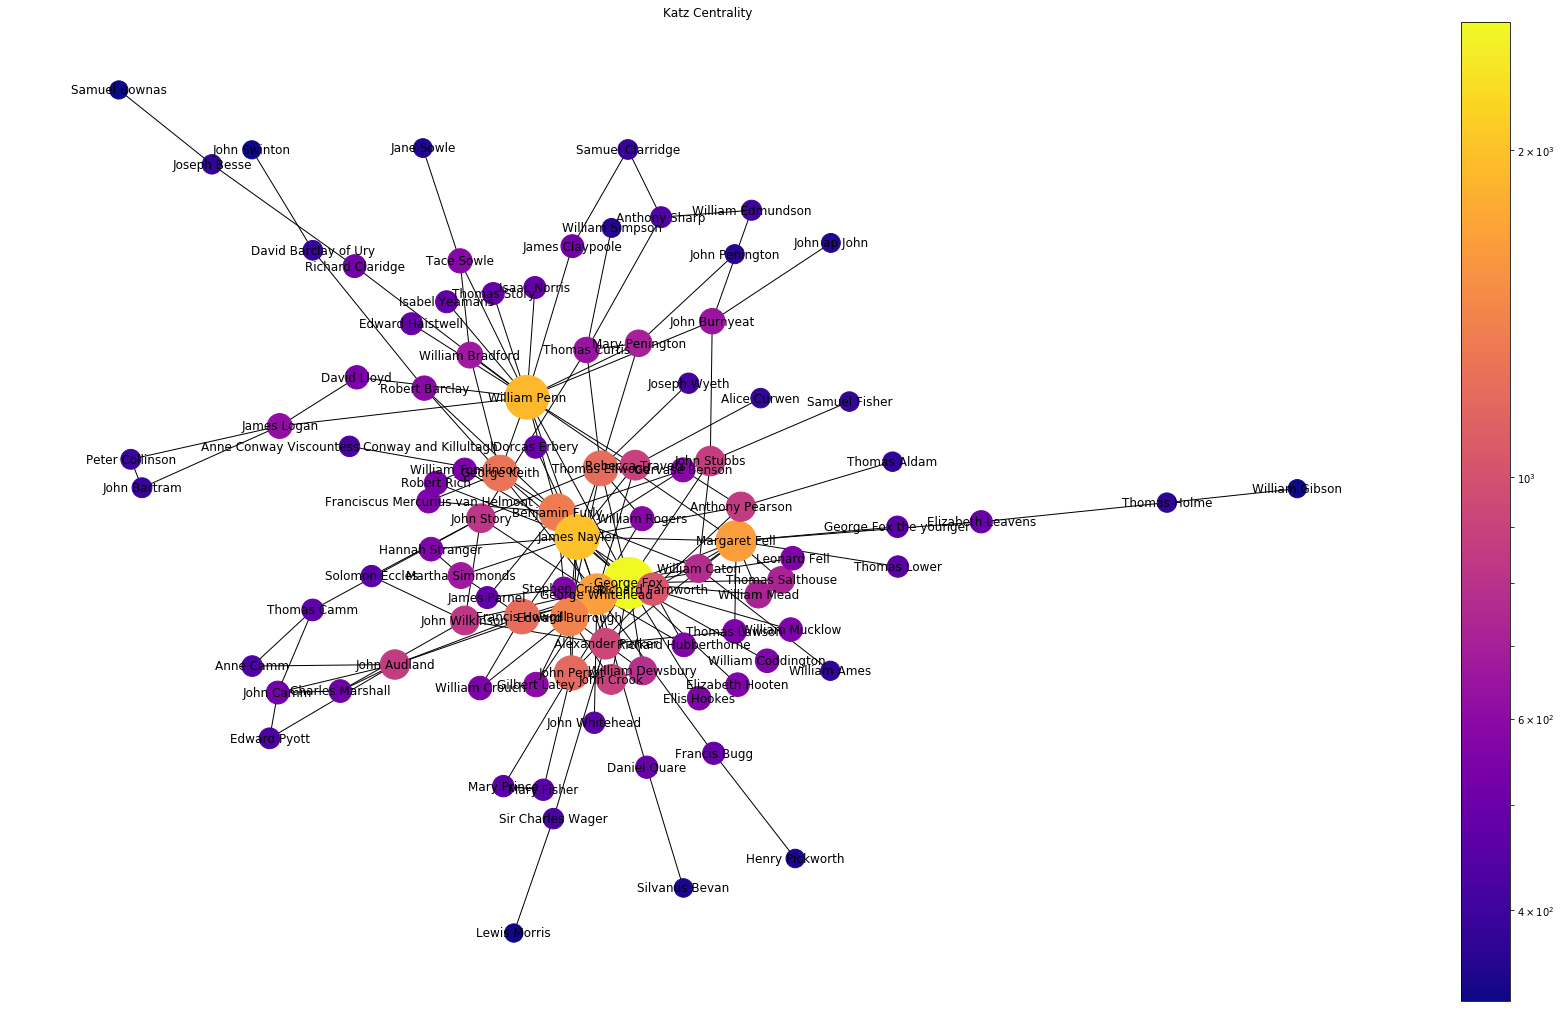

In [446]:
drawGraphColorBar(G, spring_pos, nx.katz_centrality(G, alpha=0.1, beta=.25), 'Katz Centrality')

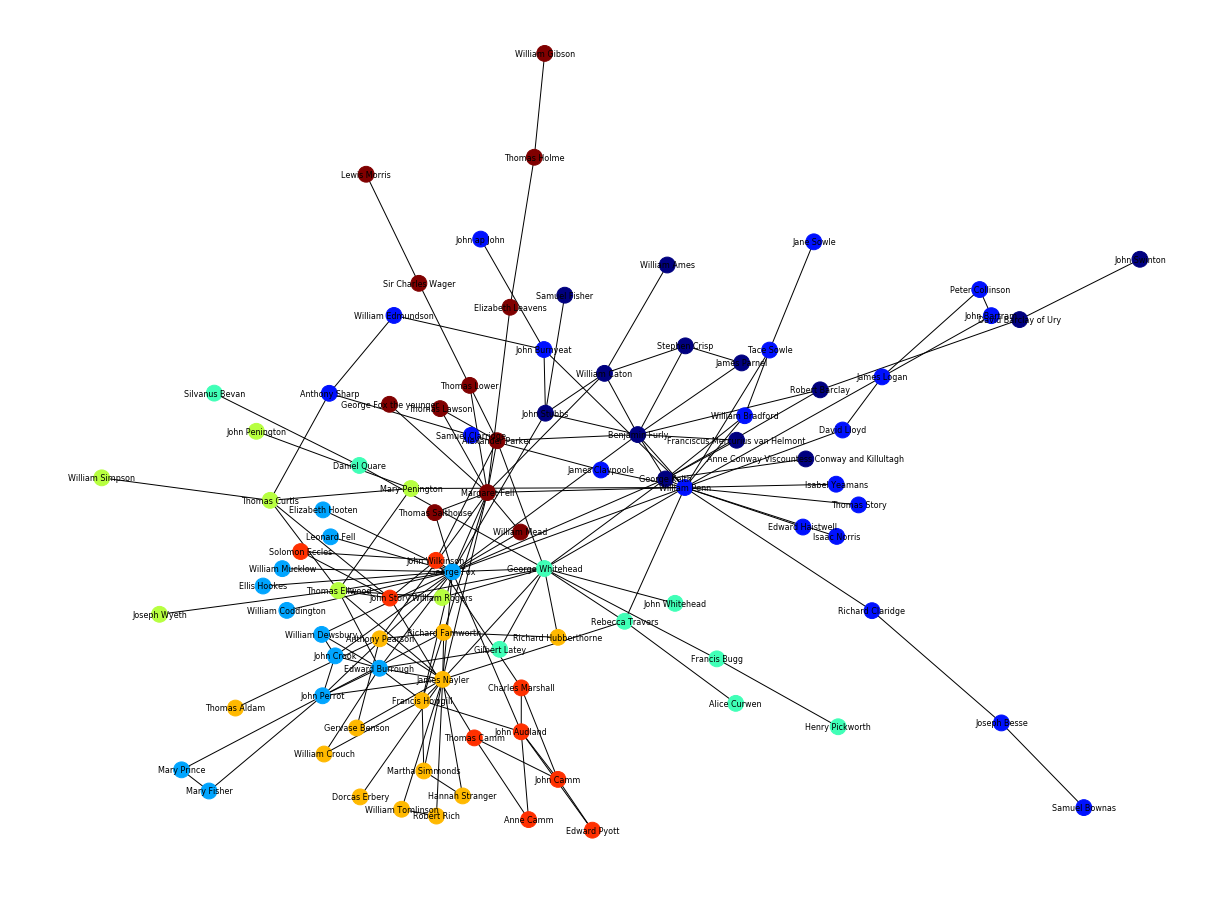

In [447]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]
fig = plot.gcf()
fig.set_size_inches(16,12)
nx.draw_spring(G, cmap = plot.get_cmap('jet'), font_size=8,node_color = values, node_size=250, with_labels=True)

The graph above shows the communities within the network. there are 8 different branches of communities within the network. 

Find the ranking within the network.

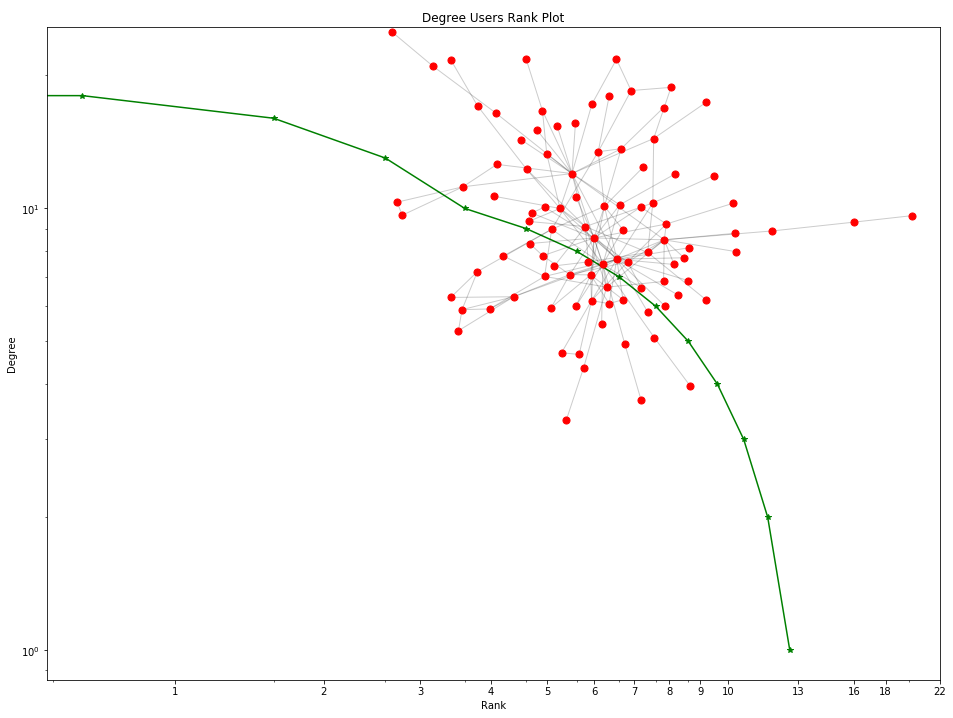

In [448]:
degree_sequence=sorted(dict(nx.degree(G)).values(),reverse=True) 
degreeCount =collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plot.subplots()
plot.loglog(deg,"g*-")
fig = plot.gcf()
fig.set_size_inches(16,12)
plot.title("Degree Users Rank Plot")
plot.ylabel("Degree")
plot.xlabel("Rank")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plot.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
plot.axis('off')
nx.draw_networkx_nodes(G, spring_pos, node_size=50)
nx.draw_networkx_edges(G, spring_pos, alpha=0.2)

plot.show()

Let’s look at the degree, closeness, and betweenness centrality of the largest degree centrality node in the network.

In [449]:
DEGREE_CENTRALITY = nx.degree_centrality(G)
CLOSENESS_CENTRALITY = nx.closeness_centrality(G)
BETWEENNESS_CENTRALITY = nx.betweenness_centrality(G)

In [450]:
def largest_node(centrality):
    return list(reversed(sorted((value, node)
                                for (node, value) in centrality.items())))[0][1]

def Centrality_Closness_Betweenness_Centrality(nNode):
    NODE = nNode
    return (DEGREE_CENTRALITY[NODE],
            CLOSENESS_CENTRALITY[NODE], BETWEENNESS_CENTRALITY[NODE])

L=largest_node(nx.degree_centrality(G))
print("\nThe largest degree of centrality node: "+ L)
print("\nThe degree of of centrality, closeness, and betweenness at the largets node :")
print("\n\nDEGREE_CENTRALITY | "+ "CLOSENESS_CENTRALITY | "+ "BETWEENNESS_CENTRALITY")
Centrality_Closness_Betweenness_Centrality(L)


The largest degree of centrality node: George Fox

The degree of of centrality, closeness, and betweenness at the largets node :


DEGREE_CENTRALITY | CLOSENESS_CENTRALITY | BETWEENNESS_CENTRALITY


(0.23157894736842105, 0.48717948717948717, 0.3661489990661325)

George Fox, a founder of the Religious Society of Friends of Quakers and seems to have the highest degree of centrality. The 49% closeness and 36% Betweenness indicates that Mr. Fox was connected and play a crucial role in bridging the network.

Find the top five rank in the network and their roles in the network

In [451]:
PAGE_RANK = nx.pagerank(G)
def top_five(ranks):
    top = list(reversed(sorted((rank, node)
                               for node, rank in ranks.items())))[:5]
    return [node for rank, node in top]
topFive=top_five(PAGE_RANK)
print(topFive)

['George Fox', 'William Penn', 'James Nayler', 'George Whitehead', 'Margaret Fell']


In [452]:
df = pd.DataFrame(displayNodes, columns = ['id', 'historical significance'])
temp=pd.DataFrame(columns=['id','historical significance'])

for i in topFive:
    s=df.loc[df.id==i]
    frames=[temp,s]
    temp=pd.concat(frames)

temp=temp.reset_index(drop=True)
print(temp)


                 id                            historical significance
0        George Fox  a founder of the Religious Society of Friends ...
1      William Penn          Quaker leader and founder of Pennsylvania
2      James Nayler                         Quaker preacher and writer
3  George Whitehead                           Quaker leader and writer
4     Margaret Fell                                      Quaker leader


In conclusion, the network indicates analysis and visual indicates that George Fox and William Penn are the most significant figures in the network. Both play a great role of bridging the network. The analysis shows weakness in the communications between the network as a whole. The network seems to be composed of 8 smaller communities. 